In [1]:
# Dependencies
import sys
sys.path.append('./helpers/')

from data_manip import *
from temporal_bases import *
from compiled_models import *

import numpy as np
import tensorflow as tf
import pickle5 as pkl
import os
import shutil
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Training data must be in the following format:
# stimulus: (nx, ny, nt, n_rep) for n_rep movies of 2D stimuli of length nt, eventually n_rep can be 1
# spikes: (n_cells, nt, n_rep) for n_cells neurons

# Load training data
with open('./data/' + 'data_bars_OFF_unrepeated' + '.pkl', 'rb') as f:
    data_train = pkl.load(f)
    
spikes = data_train['spikes'][:,:,:]
stimulus = data_train['stimulus'][:,:,:,:]
print(f'Training data:\n',
    f'stimulus shape: {stimulus.shape}\n',
      f'spikes shape: {spikes.shape}')

Training data:
 stimulus shape: (31, 1, 21600, 50)
 spikes shape: (6, 21600, 50)


In [3]:
# Flatten the spatial dimensions of the stimulus
n_cells = spikes.shape[0]
nx, ny, nt, n_rep = stimulus.shape
stimulus = np.reshape(stimulus, [nx*ny, nt, n_rep], order='F')

print(f'Flattened stimulus shape: {stimulus.shape}')

Flattened stimulus shape: (31, 21600, 50)


Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.09247974042188037
Epoch: 2, loss: 0.06434234212816617
Epoch: 3, loss: 0.06039941900690492
Epoch: 4, loss: 0.058532997860648986
Epoch: 5, loss: 0.057481191585366236
Epoch: 6, loss: 0.05684809541089113
Epoch: 7, loss: 0.05641031350102721
Epoch: 8, loss: 0.056129589279373865
Epoch: 9, loss: 0.05591130507798001
Epoch: 10, loss: 0.055798458833799976
Epoch: 11, loss: 0.05569698124696193
Epoch: 12, loss: 0.05563997886005486
Epoch: 13, loss: 0.05557880787330381
Epoch: 14, loss: 0.05554072414680816
Epoch: 15, loss: 0.05551462883584237
Epoch: 16, loss: 0.05547486896755878
Epoch: 17, loss: 0.05544968275576117
Epoch: 18, loss: 0.055439950379600936
Epoch: 19, loss: 0.05540730563219654
Epoch: 20, loss: 0.05539809306058587
Epoch: 21, loss: 0.05537889902279423
Epoch: 22, loss: 0.05536207629091432
Epoch: 23, loss: 0.055356490444481085
Epoch: 24, loss: 0.05531495516166162
Epoch: 25, loss: 0.055317157289

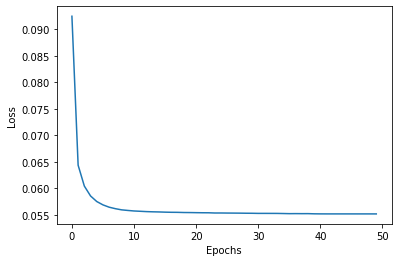

Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.1097632708232939
Epoch: 2, loss: 0.095434231860073
Epoch: 3, loss: 0.09403966431768887
Epoch: 4, loss: 0.0933324792560493
Epoch: 5, loss: 0.09281078297199245
Epoch: 6, loss: 0.092430117836837
Epoch: 7, loss: 0.09212664277359629
Epoch: 8, loss: 0.09190691407930338
Epoch: 9, loss: 0.09171075064457204
Epoch: 10, loss: 0.09159029626318713
Epoch: 11, loss: 0.09148612563903823
Epoch: 12, loss: 0.0913919443184394
Epoch: 13, loss: 0.0913203999756626
Epoch: 14, loss: 0.09127420408374955
Epoch: 15, loss: 0.09121504481614491
Epoch: 16, loss: 0.09117282944504154
Epoch: 17, loss: 0.09114337205245164
Epoch: 18, loss: 0.09111372778575386
Epoch: 19, loss: 0.09109262792687667
Epoch: 20, loss: 0.09106883281868611
Epoch: 21, loss: 0.09102655713709347
Epoch: 22, loss: 0.09102708316590798
Epoch: 23, loss: 0.09100684062288138
Epoch: 24, loss: 0.09098337704057329
Epoch: 25, loss: 0.09096683438100883
Epoch: 2

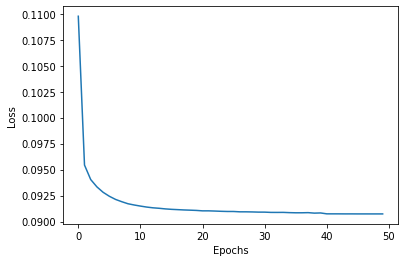

Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.13103322764617975
Epoch: 2, loss: 0.07629125846915268
Epoch: 3, loss: 0.06956967068880654
Epoch: 4, loss: 0.06689192881210569
Epoch: 5, loss: 0.06552177266035068
Epoch: 6, loss: 0.06463087338722494
Epoch: 7, loss: 0.06401339918553259
Epoch: 8, loss: 0.06355790333314375
Epoch: 9, loss: 0.06322951970452612
Epoch: 10, loss: 0.06298891123758549
Epoch: 11, loss: 0.06278116509995678
Epoch: 12, loss: 0.06263894358355748
Epoch: 13, loss: 0.06253670238885298
Epoch: 14, loss: 0.06240286833147683
Epoch: 15, loss: 0.06234417551834332
Epoch: 16, loss: 0.062255984657047465
Epoch: 17, loss: 0.062227606639693796
Epoch: 18, loss: 0.062166738850577025
Epoch: 19, loss: 0.06214303443092478
Epoch: 20, loss: 0.062089316821412034
Epoch: 21, loss: 0.06206262023789746
Epoch: 22, loss: 0.06204028258982457
Epoch: 23, loss: 0.062029956297227073
Epoch: 24, loss: 0.06199849657536123
Epoch: 25, loss: 0.0619830791637

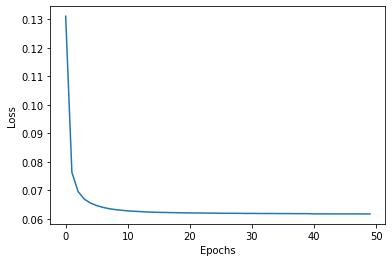

Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.12742616729944517
Epoch: 2, loss: 0.07791134858031593
Epoch: 3, loss: 0.07116921564394778
Epoch: 4, loss: 0.06845000908491713
Epoch: 5, loss: 0.0669464260892292
Epoch: 6, loss: 0.0659321019363603
Epoch: 7, loss: 0.06520926545432025
Epoch: 8, loss: 0.06469708008058904
Epoch: 9, loss: 0.06430396893948459
Epoch: 10, loss: 0.06402313015713361
Epoch: 11, loss: 0.06382247941416987
Epoch: 12, loss: 0.06367114763261314
Epoch: 13, loss: 0.06357846655236762
Epoch: 14, loss: 0.06350022044621016
Epoch: 15, loss: 0.06343207410826353
Epoch: 16, loss: 0.06339077484842978
Epoch: 17, loss: 0.06335556246875006
Epoch: 18, loss: 0.06331772156344932
Epoch: 19, loss: 0.06328624784946442
Epoch: 20, loss: 0.06327085882674849
Epoch: 21, loss: 0.06325814178186741
Epoch: 22, loss: 0.06322614320299842
Epoch: 23, loss: 0.06322424729225452
Epoch: 24, loss: 0.06320883121929671
Epoch: 25, loss: 0.06318712070334756
Ep

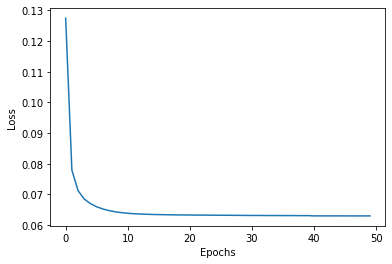

Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.09021756136745357
Epoch: 2, loss: 0.06031095484833113
Epoch: 3, loss: 0.05616883953507437
Epoch: 4, loss: 0.05439033297438656
Epoch: 5, loss: 0.0533549613502037
Epoch: 6, loss: 0.05266945090269643
Epoch: 7, loss: 0.052177527218914485
Epoch: 8, loss: 0.05181838168838378
Epoch: 9, loss: 0.05155887536027215
Epoch: 10, loss: 0.05136442154503325
Epoch: 11, loss: 0.051220577409820695
Epoch: 12, loss: 0.051124619722865416
Epoch: 13, loss: 0.05104207871348094
Epoch: 14, loss: 0.0509745037156429
Epoch: 15, loss: 0.050941753442706676
Epoch: 16, loss: 0.050870039388893895
Epoch: 17, loss: 0.050848041230625515
Epoch: 18, loss: 0.050822555710467995
Epoch: 19, loss: 0.05079434842548587
Epoch: 20, loss: 0.0507557097234224
Epoch: 21, loss: 0.05071614514412492
Epoch: 22, loss: 0.050703072909747016
Epoch: 23, loss: 0.05069486867618618
Epoch: 24, loss: 0.05066846813560958
Epoch: 25, loss: 0.0506588315368

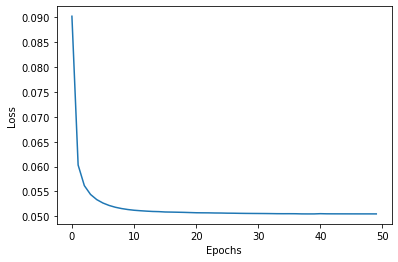

Total size of the dataset: 865.325927734375
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.10770688920714068
Epoch: 2, loss: 0.05476558050898274
Epoch: 3, loss: 0.04784683229749283
Epoch: 4, loss: 0.04508664321118707
Epoch: 5, loss: 0.043836362254427094
Epoch: 6, loss: 0.04312463043052614
Epoch: 7, loss: 0.042643409066401315
Epoch: 8, loss: 0.042334050696753146
Epoch: 9, loss: 0.04209651873941627
Epoch: 10, loss: 0.04194345142353665
Epoch: 11, loss: 0.04182282390794828
Epoch: 12, loss: 0.04173173455512552
Epoch: 13, loss: 0.04168413234740923
Epoch: 14, loss: 0.04163942163605154
Epoch: 15, loss: 0.04159858752238123
Epoch: 16, loss: 0.04158116444838389
Epoch: 17, loss: 0.04156024253628613
Epoch: 18, loss: 0.041539985221324925
Epoch: 19, loss: 0.041518041179582264
Epoch: 20, loss: 0.0415010235374838
Epoch: 21, loss: 0.0414822411727891
Epoch: 22, loss: 0.041485450111115665
Epoch: 23, loss: 0.04147667511495534
Epoch: 24, loss: 0.041458159701176805
Epoch: 25, loss: 0.0414658416927

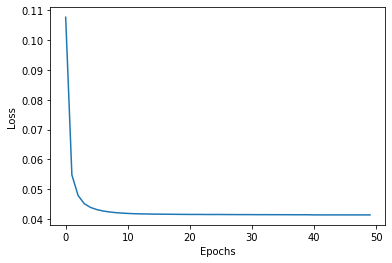

In [4]:
### GLM inference

# Pretrained model
load_pretrained = False
path_weights = './model_weights/GLM/'

# Split the dataset in parts of size < to:
max_size_dataslice = 1024 # in Mo

# Training parameters
batch_size = 1024
nepochs = 50
n_epochs_stim_freeze = 40 # Freeze the stimulus filter and continue couplings optimization

# Storage
models = []
losses = np.zeros((n_cells, nepochs))

# Parameters of the temporal bases
first_peak_stim, last_peak_stim, streach_stim, n_basis_stim, nt_integ_stim = 1, 170, 100, 6, 200
first_peak_coupl, last_peak_coupl, streach_coupl, n_basis_coupl, nt_integ_coupl = 0, 15, 5, 4, 25
last_peak_self, streach_self, n_basis_self, nt_integ_self = 20, 1, 5, 25

# Stimulus basis
stim_basis = raised_cosine_basis(first_peak_stim, last_peak_stim, streach_stim, n_basis_stim, nt_integ_stim)
# Coupling basis
coupl_basis = raised_cosine_basis(first_peak_coupl, last_peak_coupl, streach_coupl, n_basis_coupl, nt_integ_coupl)

for cell in range(n_cells):
    # Self coupling basis
    self_basis, tau_r = self_basis_gen(last_peak_self, streach_self, n_basis_self, nt_integ_self, cell, spikes)
    
    # Build the training dataset
    n_parts_dataset = build_dataset(stimulus, spikes, max_size_dataslice, stim_basis, 'GLM',
                                 cell, coupl_basis, self_basis, tau_r)
    # If the whole dataset fits in memory, load it once
    if n_parts_dataset == 1:
        dataset_full = load_dataset(model='GLM', cell=cell, batch_size=batch_size, ipart=0, n_basis_coupl=n_basis_coupl, n_basis_self=n_basis_self)

    # Create the model
    n_basis_stim, nt_integ_stim = stim_basis.shape
    n_basis_coupl = coupl_basis.shape[0]
    n_basis_self = self_basis.shape[0]

    temp_model = compiled_GLM_model(nx=nx, ny=ny, n_cells=n_cells, n_basis_stim=n_basis_stim,
                                   n_basis_coupl=n_basis_coupl, n_basis_self=n_basis_self,
                                   l1_reg_stim=0, l2_reg_stim=0, l2_lapl_reg=2e-3, lapl_axis='all', 
                                   l1_reg_coupl=1e-5, l2_reg_coupl=0, l1_reg_self=1e-5, l2_reg_self=0)

    # Load pretrained model weights
    if load_pretrained == True:
        temp_model.load_weights(path_weights+'cell'+str(cell))
    
    # Training
    loss_epoch = []
    for epoch in range(nepochs):
        if epoch == n_epochs_stim_freeze:
            # Freeze the stimulus filter
            temp_model.get_layer('stimulus_filter').trainable = False
            temp_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Poisson())
        loss_value, n_elt = 0, 0
        
        # Train the model
        if n_parts_dataset == 1:
            # Full dataset already in memory
            for stim_train, coupl_train, self_train, refr_train, spikes_train in dataset_full:
                n_elt += 1
                loss_value += temp_model.train_on_batch([stim_train, coupl_train, self_train, refr_train], spikes_train, sample_weight=None, reset_metrics=True)
        else:
            # Iterate over dataset slices
            for ipart in range(n_parts_dataset):
                dataset_slice = load_dataset(model='GLM', cell=cell, batch_size=batch_size, ipart=ipart, n_basis_coupl=n_basis_coupl, n_basis_self=n_basis_self)
                for stim_train, coupl_train, self_train, refr_train, spikes_train in dataset_slice:
                    n_elt += 1
                    loss_value += temp_model.train_on_batch([stim_train, coupl_train, self_train, refr_train], spikes_train, sample_weight=None, reset_metrics=True)
        
        # Print and store loss
        print(f'Epoch: {epoch+1}, loss: {loss_value/n_elt}')
        loss_epoch += [loss_value/n_elt]

    # Store loss
    losses[cell,:] = loss_epoch
    
    # Plot loss
    plt.plot(loss_epoch)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Store model
    models += [temp_model]
    
# Clean temp data
shutil.rmtree('./dataset_temp')

In [5]:
# Save the weights and biases of the models
path_weights = './model_weights/GLM/'

if not os.path.exists(path_weights):
    os.makedirs(path_weights)

for cell in range(n_cells):
    model = models[cell]
    model.save_weights(path_weights+'cell'+str(cell))

In [6]:
# Extract filters from the models

path_filters = './model_filters/GLM/'

stim_filter, bias_list, coupl_filters, self_filters, tau_r_list = [], [], [], [], []
for cell in range(n_cells):
    # Weights and biases
    stimulus_coeffs, bias = models[cell].get_layer(name='stimulus_filter').weights
    coupling_coeffs = models[cell].get_layer(name='coupling_filters').weights[0]
    self_coeffs = models[cell].get_layer(name='self_filter').weights[0]

    # Stimulus model
    stimulus_filter = np.matmul(np.reshape(stimulus_coeffs.numpy(), [nx*ny, n_basis_stim]), stim_basis)
    stim_filter += [stimulus_filter[:,:,np.newaxis, np.newaxis]]
    
    bias_list += [bias.numpy()]
    
    # Couplings
    coupl_filters += [np.matmul(np.reshape(coupling_coeffs.numpy(), [n_cells-1, n_basis_coupl]), coupl_basis)]
    
    # Self coupling and refractory period
    self_basis, tau_r = self_basis_gen(last_peak_self, streach_self, n_basis_self,
                                   nt_integ_self, cell, spikes)
    self_filters += [np.matmul(self_coeffs.numpy().transpose(), self_basis)]
    tau_r_list += [tau_r]
    
if not os.path.exists(path_filters):
    os.makedirs(path_filters)

with open(path_filters+'filters.pkl', 'wb') as f:
    pkl.dump((stim_filter, bias_list, coupl_filters, self_filters, tau_r_list), f)

Total size of the dataset: 763.2827758789062
Split in 1 parts
part 1 length: 1070000
Epoch: 1, loss: 0.08611547306456278
Epoch: 2, loss: 0.06675768842771382
Epoch: 3, loss: 0.06463541145604683
Epoch: 4, loss: 0.06374789305592767
Epoch: 5, loss: 0.06329236430473599
Epoch: 6, loss: 0.06302589830584851
Epoch: 7, loss: 0.06285092230890676
Epoch: 8, loss: 0.06273116844753027
Epoch: 9, loss: 0.06264680743949382
Epoch: 10, loss: 0.06258581532978644
Epoch: 11, loss: 0.06253910537037116
Epoch: 12, loss: 0.06250219072368994
Epoch: 13, loss: 0.0624715663612437
Epoch: 14, loss: 0.062445367853665217
Epoch: 15, loss: 0.062422326574843985
Epoch: 16, loss: 0.06240137524726805
Epoch: 17, loss: 0.06238228731819887
Epoch: 18, loss: 0.0623648056945358
Epoch: 19, loss: 0.0623480091506446
Epoch: 20, loss: 0.0623327613321944
Epoch: 21, loss: 0.06231823679712561
Epoch: 22, loss: 0.062304366829372834
Epoch: 23, loss: 0.06229123118919494
Epoch: 24, loss: 0.06227870805196812
Epoch: 25, loss: 0.06226685208955815


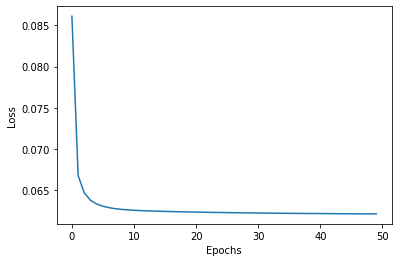

Epoch: 1, loss: 0.1503939038650556
Epoch: 2, loss: 0.103978990039757
Epoch: 3, loss: 0.10037078214497372
Epoch: 4, loss: 0.09891674410213123
Epoch: 5, loss: 0.09809580231575589
Epoch: 6, loss: 0.09762102143580549
Epoch: 7, loss: 0.09734625170212328
Epoch: 8, loss: 0.09717299093862185
Epoch: 9, loss: 0.09704750524254507
Epoch: 10, loss: 0.09694961673406323
Epoch: 11, loss: 0.09687165768380371
Epoch: 12, loss: 0.09680779516946471
Epoch: 13, loss: 0.09675351943660296
Epoch: 14, loss: 0.09670698653068839
Epoch: 15, loss: 0.09666658547399432
Epoch: 16, loss: 0.09662968866420134
Epoch: 17, loss: 0.09659708010558592
Epoch: 18, loss: 0.0965667172072179
Epoch: 19, loss: 0.0965391283596389
Epoch: 20, loss: 0.09651319026840076
Epoch: 21, loss: 0.09648892441898156
Epoch: 22, loss: 0.09646597734549969
Epoch: 23, loss: 0.09644489048592497
Epoch: 24, loss: 0.09642461452223182
Epoch: 25, loss: 0.09640601722247293
Epoch: 26, loss: 0.09638778985295285
Epoch: 27, loss: 0.09637103556659804
Epoch: 28, loss

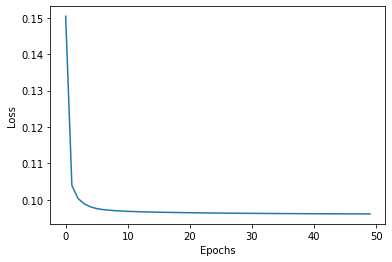

Epoch: 1, loss: 0.11765094804778053
Epoch: 2, loss: 0.0757126604808432
Epoch: 3, loss: 0.07157332257381038
Epoch: 4, loss: 0.06990178068019183
Epoch: 5, loss: 0.0690231859964167
Epoch: 6, loss: 0.06852110496178519
Epoch: 7, loss: 0.06820112348781479
Epoch: 8, loss: 0.06797295439749974
Epoch: 9, loss: 0.06779910472743035
Epoch: 10, loss: 0.06766397600924445
Epoch: 11, loss: 0.06755846512501694
Epoch: 12, loss: 0.06747483225003482
Epoch: 13, loss: 0.06740815709361753
Epoch: 14, loss: 0.06735391325164702
Epoch: 15, loss: 0.06730980210649028
Epoch: 16, loss: 0.0672732522320136
Epoch: 17, loss: 0.06724246160102713
Epoch: 18, loss: 0.06721635705114089
Epoch: 19, loss: 0.06719404656440577
Epoch: 20, loss: 0.06717473320603375
Epoch: 21, loss: 0.06715732482899733
Epoch: 22, loss: 0.06714195856207907
Epoch: 23, loss: 0.06712812027920698
Epoch: 24, loss: 0.06711549077912135
Epoch: 25, loss: 0.0671040151499682
Epoch: 26, loss: 0.06709300229926349
Epoch: 27, loss: 0.06708320199537568
Epoch: 28, los

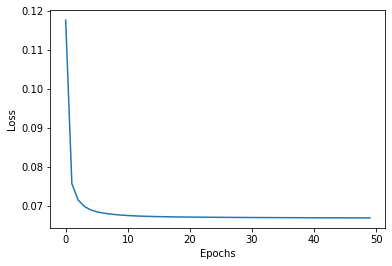

Epoch: 1, loss: 0.12001346259524948
Epoch: 2, loss: 0.0825815098217586
Epoch: 3, loss: 0.07904646364553122
Epoch: 4, loss: 0.07765647079127186
Epoch: 5, loss: 0.07688398426042148
Epoch: 6, loss: 0.07642617694249279
Epoch: 7, loss: 0.07614089488876208
Epoch: 8, loss: 0.07594732691279867
Epoch: 9, loss: 0.0758088154272671
Epoch: 10, loss: 0.07570656099976107
Epoch: 11, loss: 0.07562916792447914
Epoch: 12, loss: 0.07557003260389612
Epoch: 13, loss: 0.07552326668419265
Epoch: 14, loss: 0.0754856137117665
Epoch: 15, loss: 0.07545448545339789
Epoch: 16, loss: 0.07542855888382313
Epoch: 17, loss: 0.07540663432365542
Epoch: 18, loss: 0.0753873206140322
Epoch: 19, loss: 0.07537057977526239
Epoch: 20, loss: 0.07535543376713563
Epoch: 21, loss: 0.07534234765516015
Epoch: 22, loss: 0.07532995017824703
Epoch: 23, loss: 0.07531846885003471
Epoch: 24, loss: 0.07530799112037609
Epoch: 25, loss: 0.07529796463210117
Epoch: 26, loss: 0.0752888756590276
Epoch: 27, loss: 0.07528013038899055
Epoch: 28, loss

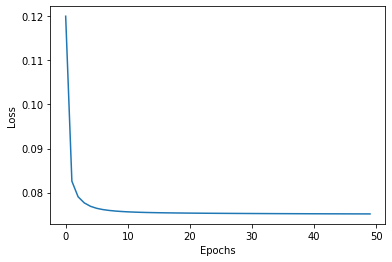

Epoch: 1, loss: 0.16157785507551792
Epoch: 2, loss: 0.07314854957537645
Epoch: 3, loss: 0.06608070467273441
Epoch: 4, loss: 0.0636561105642735
Epoch: 5, loss: 0.06235533271287902
Epoch: 6, loss: 0.06144571693761176
Epoch: 7, loss: 0.06082198039927123
Epoch: 8, loss: 0.06042104836923191
Epoch: 9, loss: 0.060177208484778776
Epoch: 10, loss: 0.06002607739638564
Epoch: 11, loss: 0.05992192310118451
Epoch: 12, loss: 0.059844436638032725
Epoch: 13, loss: 0.0597839137762072
Epoch: 14, loss: 0.05973540311851917
Epoch: 15, loss: 0.05969519741185963
Epoch: 16, loss: 0.05966092990343704
Epoch: 17, loss: 0.05963101248790479
Epoch: 18, loss: 0.059604627095858016
Epoch: 19, loss: 0.05958078244492706
Epoch: 20, loss: 0.05955892825704157
Epoch: 21, loss: 0.05953912908483172
Epoch: 22, loss: 0.05952068920086837
Epoch: 23, loss: 0.05950363637109701
Epoch: 24, loss: 0.05948755305921035
Epoch: 25, loss: 0.05947243692286527
Epoch: 26, loss: 0.05945818490626148
Epoch: 27, loss: 0.05944452849968724
Epoch: 28

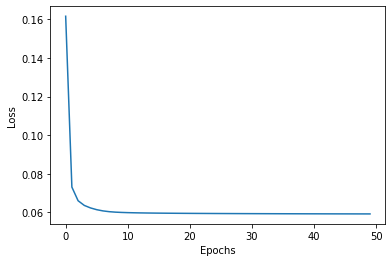

Epoch: 1, loss: 0.08721344424233411
Epoch: 2, loss: 0.05376427938791803
Epoch: 3, loss: 0.05101106937898938
Epoch: 4, loss: 0.049806745932103276
Epoch: 5, loss: 0.049050612698373734
Epoch: 6, loss: 0.04859030983178502
Epoch: 7, loss: 0.04833102397574446
Epoch: 8, loss: 0.048184872918475966
Epoch: 9, loss: 0.04809310584839848
Epoch: 10, loss: 0.048027203216871386
Epoch: 11, loss: 0.047975380673395185
Epoch: 12, loss: 0.04793323537852263
Epoch: 13, loss: 0.0478978453941797
Epoch: 14, loss: 0.047867556696208464
Epoch: 15, loss: 0.04784077727946043
Epoch: 16, loss: 0.04781831489401339
Epoch: 17, loss: 0.04779794787596488
Epoch: 18, loss: 0.04777986651153357
Epoch: 19, loss: 0.047763825587621385
Epoch: 20, loss: 0.04774907964853231
Epoch: 21, loss: 0.0477360384077843
Epoch: 22, loss: 0.04772408554135793
Epoch: 23, loss: 0.04771319219692717
Epoch: 24, loss: 0.047702720508973104
Epoch: 25, loss: 0.04769339490346009
Epoch: 26, loss: 0.04768442058708501
Epoch: 27, loss: 0.04767639208360827
Epoc

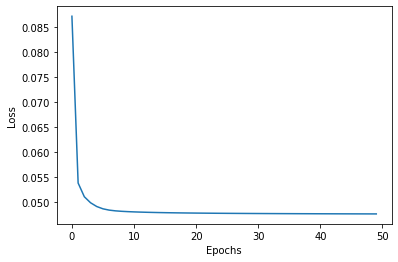

In [7]:
### LN model inference

# Pretrained model
load_pretrained = False
path_weights = './model_weights/LN/'

# Split the dataset in parts of size < to:
max_size_dataslice = 2048 # in Mo

# Training parameters
batch_size = 1024
nepochs = 50

# Storage
models = []
losses = np.zeros((n_cells, nepochs))

# Parameters of the temporal bases
first_peak_stim, last_peak_stim, streach_stim, n_basis_stim, nt_integ_stim = 1, 170, 100, 6, 200
# Stimulus basis
stim_basis = raised_cosine_basis(first_peak_stim, last_peak_stim, streach_stim, n_basis_stim, nt_integ_stim)

# Build the training dataset
n_parts_dataset = build_dataset(stimulus, spikes, max_size_dataslice, stim_basis, 'LN')

for cell in range(n_cells):
    # If the whole dataset fits in memory, load it once
    if n_parts_dataset == 1:
        dataset_full = load_dataset(model='LN', cell=cell, batch_size=batch_size, ipart=0)

    # Create the model
    n_basis_stim, nt_integ_stim = stim_basis.shape

    temp_model = compiled_LN_model(nx=nx, ny=ny, n_basis_stim=n_basis_stim, l1_reg_stim=0, 
                                   l2_reg_stim=0, l2_lapl_reg_stim=2e-3, lapl_axis='all')

    # Load pretrain model weights
    if load_pretrained == True:
        temp_model.load_weights(path_weights+'cell'+str(cell))
    
    # Training
    loss_epoch = []
    for epoch in range(nepochs):
        loss_value, n_elt = 0, 0
        
        # Train the model
        if n_parts_dataset == 1:
            # Full dataset already in memory
            for stim_train, spikes_train in dataset_full:
                n_elt += 1
                loss_value += temp_model.train_on_batch(stim_train, spikes_train, sample_weight=None, reset_metrics=True)
        else:
            # Iterate over dataset slices
            for ipart in range(n_parts_dataset):
                dataset_slice = load_dataset(model='LN', cell=cell, batch_size=batch_size, ipart=ipart)
                for stim_train, spikes_train in dataset_slice:
                    n_elt += 1
                    loss_value += temp_model.train_on_batch(stim_train, spikes_train, sample_weight=None, reset_metrics=True)
        
        # Print and store loss
        print(f'Epoch: {epoch+1}, loss: {loss_value/n_elt}')
        loss_epoch += [loss_value/n_elt]

    # Store loss
    losses[cell,:] = loss_epoch
    
    # Plot loss
    plt.plot(loss_epoch)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Store model
    models += [temp_model]
    
# Clean temp data
shutil.rmtree('./dataset_temp')

In [8]:
# Save the weights of the models
path_weights = './model_weights/LN/'

if not os.path.exists(path_weights):
    os.makedirs(path_weights)

for cell in range(n_cells):
    model = models[cell]
    model.save_weights(path_weights+'cell'+str(cell))

In [9]:
# Extract filters from the models

path_filters = './model_filters/LN/'

stim_filter, bias_list, coupl_filters, self_filters, tau_r_list = [], [], [], [], []
for cell in range(n_cells):
    # Weights and biases
    stimulus_coeffs, bias = models[cell].get_layer(name='stimulus_filter').weights

    # Stimulus model
    stimulus_filter = np.matmul(np.reshape(stimulus_coeffs.numpy(), [nx*ny, n_basis_stim]), stim_basis)
    stim_filter += [stimulus_filter[:,:,np.newaxis, np.newaxis]]
    
    bias_list += [bias.numpy()]
    
if not os.path.exists(path_filters):
    os.makedirs(path_filters)

with open(path_filters+'filters.pkl', 'wb') as f:
    pkl.dump((stim_filter, bias_list), f)